# ACWA Power's Financial Analysis

This notebook performs a comprehensive financial analysis of ACWA Power company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the ACWA Power raw data from the CSV file
acwa_power_raw_data = pd.read_csv('acwa_power.csv')

# Display the first few rows to understand the data structure
acwa_power_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,ACWA Power,Energy,4114999,880083,918471,37747537,27142160
1,2020,ACWA Power,Energy,4829111,902387,1767939,36260987,28860832
2,2021,ACWA Power,Energy,5360940,743908,1836995,45708698,31388553
3,2022,ACWA Power,Energy,5275930,1476410,2363251,48845920,28817526
4,2023,ACWA Power,Energy,6095010,1771329,2983572,55018314,34309423


In [3]:
# Get a summary of the dataset including data types and non-null counts
acwa_power_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in ACWA Power's financial statements.

In [4]:
# Sort the data by year to ensure chronological order
acwa_power_raw_data = acwa_power_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
acwa_power_raw_data[numeric_cols] = acwa_power_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
acwa_power_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,ACWA Power,Energy,4114999.0,880083.0,918471.0,37747537.0,27142160.0
1,2020,ACWA Power,Energy,4829111.0,902387.0,1767939.0,36260987.0,28860832.0
2,2021,ACWA Power,Energy,5360940.0,743908.0,1836995.0,45708698.0,31388553.0
3,2022,ACWA Power,Energy,5275930.0,1476410.0,2363251.0,48845920.0,28817526.0
4,2023,ACWA Power,Energy,6095010.0,1771329.0,2983572.0,55018314.0,34309423.0
5,2024,ACWA Power,Energy,6297298.0,1987836.0,3011901.0,56882706.0,32576949.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
acwa_power_new_data = acwa_power_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
acwa_power_new_data['Revenue_Growth_%'] = acwa_power_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(acwa_power_new_data['Revenue_SAR'].iloc[0], acwa_power_new_data['Revenue_SAR'].iloc[-1], len(acwa_power_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 8.88%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
acwa_power_new_data['Operating_Margin_%'] = (acwa_power_new_data['Operating_Income_SAR'] / acwa_power_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
acwa_power_new_data['Net_Profit_Margin_%'] = (acwa_power_new_data['Net_Income_SAR'] / acwa_power_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(acwa_power_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019           22.320078            21.387198
1  2020           36.610030            18.686400
2  2021           34.266285            13.876447
3  2022           44.793070            27.983882
4  2023           48.951060            29.061954
5  2024           47.828465            31.566491


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
acwa_power_new_data['Liabilities_to_Assets_Ratio'] = (acwa_power_new_data['Total_Liabilities_SAR'] / acwa_power_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
acwa_power_new_data['Asset_Turnover_Ratio'] = acwa_power_new_data['Revenue_SAR'] / acwa_power_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(acwa_power_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    71.904453              0.109014
1  2020                    79.591965              0.133176
2  2021                    68.670853              0.117285
3  2022                    58.996792              0.108012
4  2023                    62.360004              0.110781
5  2024                    57.270393              0.110707


## Visualizations

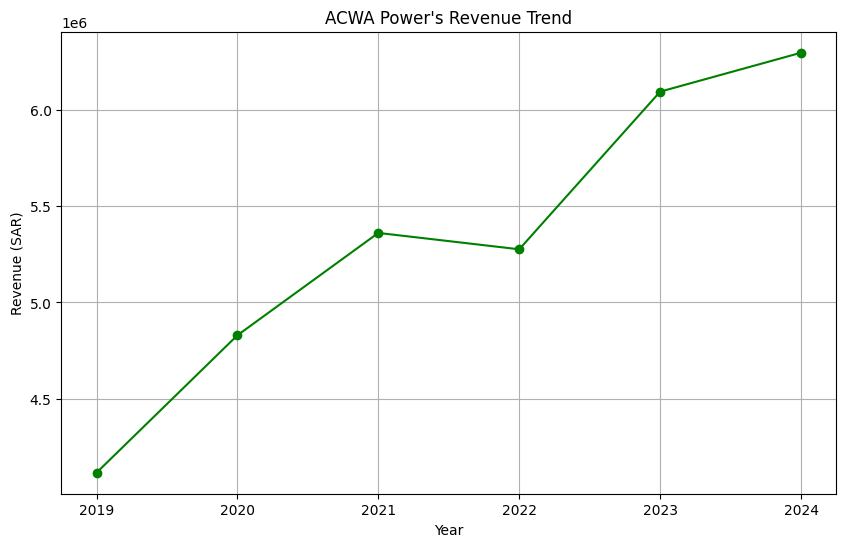

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(acwa_power_new_data["Year"], acwa_power_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("ACWA Power's Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

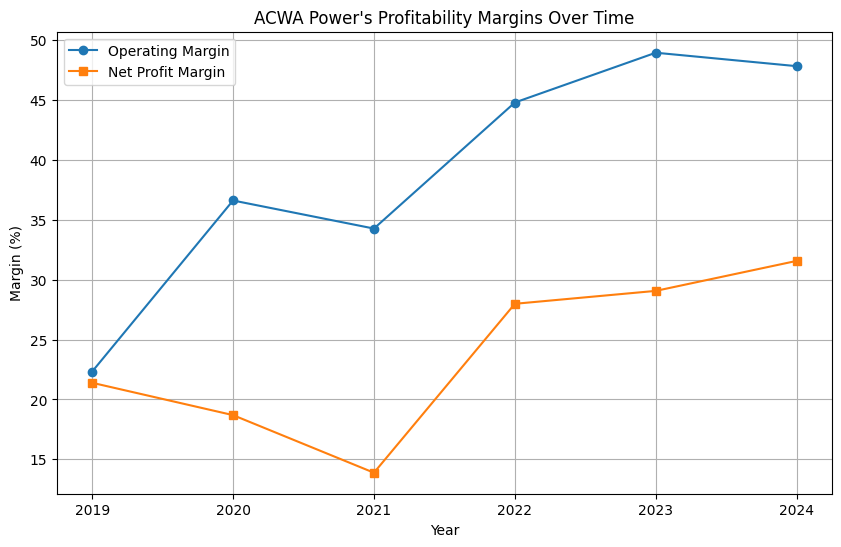

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(acwa_power_new_data["Year"], acwa_power_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(acwa_power_new_data["Year"], acwa_power_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("ACWA Power's Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
acwa_power_new_data.to_csv('acwa_power_analysis_results.csv', index=False)
print("Analysis results saved to 'acwa_power_analysis_results.csv'")

Analysis results saved to 'acwa_power_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of ACWA Power's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.